In [1]:
#Подключаем библиотеку pandas работы с данными, и ставим ей в соответствие псевдоним pd
import pandas as pd
#Подключаем библиотеку pyplot для рисовнаия графиков, и ставим ей в соответствие псевдоним plt
import matplotlib.pyplot as plt
#Подключаем компаненту datetime из библиотеке datetime для работы с временем, 
from datetime import datetime

In [2]:
#Загружаем данные из xlsx-файла vk_data.xlsx в переменную df
df = pd.read_excel("vk_data.xlsx")

In [3]:
#Выведем первые несколько строчек исходных данных (по умолчанию 5)
df.head()

,text,author,date
0,Машинное обучение в облаке на языке Python,-91453124,2015-06-10 11:02:11
1,📌 Большая шпаргалка по JavaScriptСохраняй себе...,-54530371,2020-05-02 11:02:02
2,⚡ Главные IT-новости к этому часу:Агрегатор оц...,-20629724,2020-09-08 08:30:52
3,Программист 2020: Терминатор отдыхает.Эволюция...,-20629724,2020-09-13 13:00:36
4,"В.Н.И.М.А.Н.И.Е, _ У.Д.А.Л.Ё.Н.Н.А.Я _ Р.А.Б.О...",459994712,2018-02-19 14:53:38


In [4]:
#Выведем текст первого сообщения
print(df["text"][0])

Машинное обучение в облаке на языке Python


In [5]:
#Выведем общее размерность таблицы df
print(f"Таблица имеет размерность {df.shape}")
#Выведем общее количество записей
print(f"Всего записей {df.shape[0]}")

Таблица имеет размерность (12068, 3)
Всего записей 12068


In [6]:
#Заметим, что в df некоторые строчки имеет значени NaN в поле text
df.tail()

,text,author,date
12063,Building Evolutionary Architectures (2017)Авто...,-54530371,2019-12-18 12:00:06
12064,Math Adventures with Python (2019) Автор: Pete...,-54530371,2020-10-11 16:01:00
12065,Интереснейшее влияние Cyclone.Мало кто слышал ...,-20629724,2020-10-21 18:00:45
12066,NaN,-61384743,2013-11-24 10:57:04
12067,NaN,-61384743,2014-06-28 22:52:02


In [7]:
#Избавимся от строк, где присутствуют Nan
df = df.dropna()
#При удалении строк индексы не сохраняют однородность, перестроим индексы
df = df.reset_index(drop=True)

In [8]:
#Заметим что text имеют заглавные буквы и могут иметь пробелы в начале/конце строки.
#Рассмотрим функции строк
string = "  МаМа МыЛа РаМу  "
print(f"Приведем строку {string} к: нижнему регистру - {string.lower()}, верхнему регистру - {string.upper()}")
print(f"Удалим пробелы из сткрои {string} в начале и конце: {string.strip()}")
print(f"Применим сразу две операции: {string.lower().strip()}")

Приведем строку   МаМа МыЛа РаМу   к: нижнему регистру -   мама мыла раму  , верхнему регистру -   МАМА МЫЛА РАМУ  
Удалим пробелы из сткрои   МаМа МыЛа РаМу   в начале и конце: МаМа МыЛа РаМу
Применим сразу две операции: мама мыла раму


In [9]:
#Реализуем функцию transform_string которая принемает строку и применяет описынные выше приобразования
def transform_string(string):
    return string.lower().strip()
#Или применим более короткий вариант с lambda функцией
transform_string = lambda x: x.lower().strip()

In [10]:
#Привидем transform_string ко всем строка в df
df["text"] = df["text"].apply(transform_string)

In [11]:
#Соберем все синонимы слова python
python_synonyms = ["python", "питон", "пайтон"]
#Посмотрим сколько строк сожержат слово python
df_python = df[df["text"].apply(lambda x: any([y in x for y in python_synonyms]))]
df_python.head()

,text,author,date
0,машинное обучение в облаке на языке python,-91453124,2015-06-10 11:02:11
13,"black hat go (2020) авторы: tom steele, chris ...",-54530371,2020-02-23 17:01:00
15,building django 2.0 web applications: create e...,-79831840,2020-10-21 15:00:08
17,3 самых важных сферы применения python: возмож...,-54530371,2019-05-29 09:00:04
19,python для решения практических задачскачивани...,-79831840,2020-08-18 18:00:01


In [12]:
#Посмотрим сколько всеего строк сожержат слово python 
print(f"Всего строк содержащих слово python: {df_python.shape[0]}")

Всего строк содержащих слово python: 1387


In [13]:
#Узнаем сколько всего пользователей писали сообщения, содержащих слово python
print(f"Всего уникальных id авторов: {df_python['author'].unique().shape[0]}")
print(f"Все уникальные id авторов: {df_python['author'].unique()}")

Всего уникальных id авторов: 21
Все уникальные id авторов: [-91453124 -54530371 -79831840 -20629724 571836684 517177679 539238123
 583932944  90780920 482250746 133604210 327442853 493476570 137652947
 537981243 265981551 510330162  16066423 569882984 482249549 403066287]


In [14]:
print(f"Заметим что столбец date уже имеет тип {type(df_python['date'][0])}, т.е. нам не мужно приводить строку ко времени")
#Добавим в df столбец, который содержит дату в виде год:месяц
df_python = df_python.assign(year_month = df_python["date"].apply(lambda x: f"{x.year}_{x.month}"))
df_python.head()

Заметим что столбец date уже имеет тип <class 'pandas._libs.tslibs.timestamps.Timestamp'>, т.е. нам не мужно приводить строку ко времени


,text,author,date,year_month
0,машинное обучение в облаке на языке python,-91453124,2015-06-10 11:02:11,2015_6
13,"black hat go (2020) авторы: tom steele, chris ...",-54530371,2020-02-23 17:01:00,2020_2
15,building django 2.0 web applications: create e...,-79831840,2020-10-21 15:00:08,2020_10
17,3 самых важных сферы применения python: возмож...,-54530371,2019-05-29 09:00:04,2019_5
19,python для решения практических задачскачивани...,-79831840,2020-08-18 18:00:01,2020_8


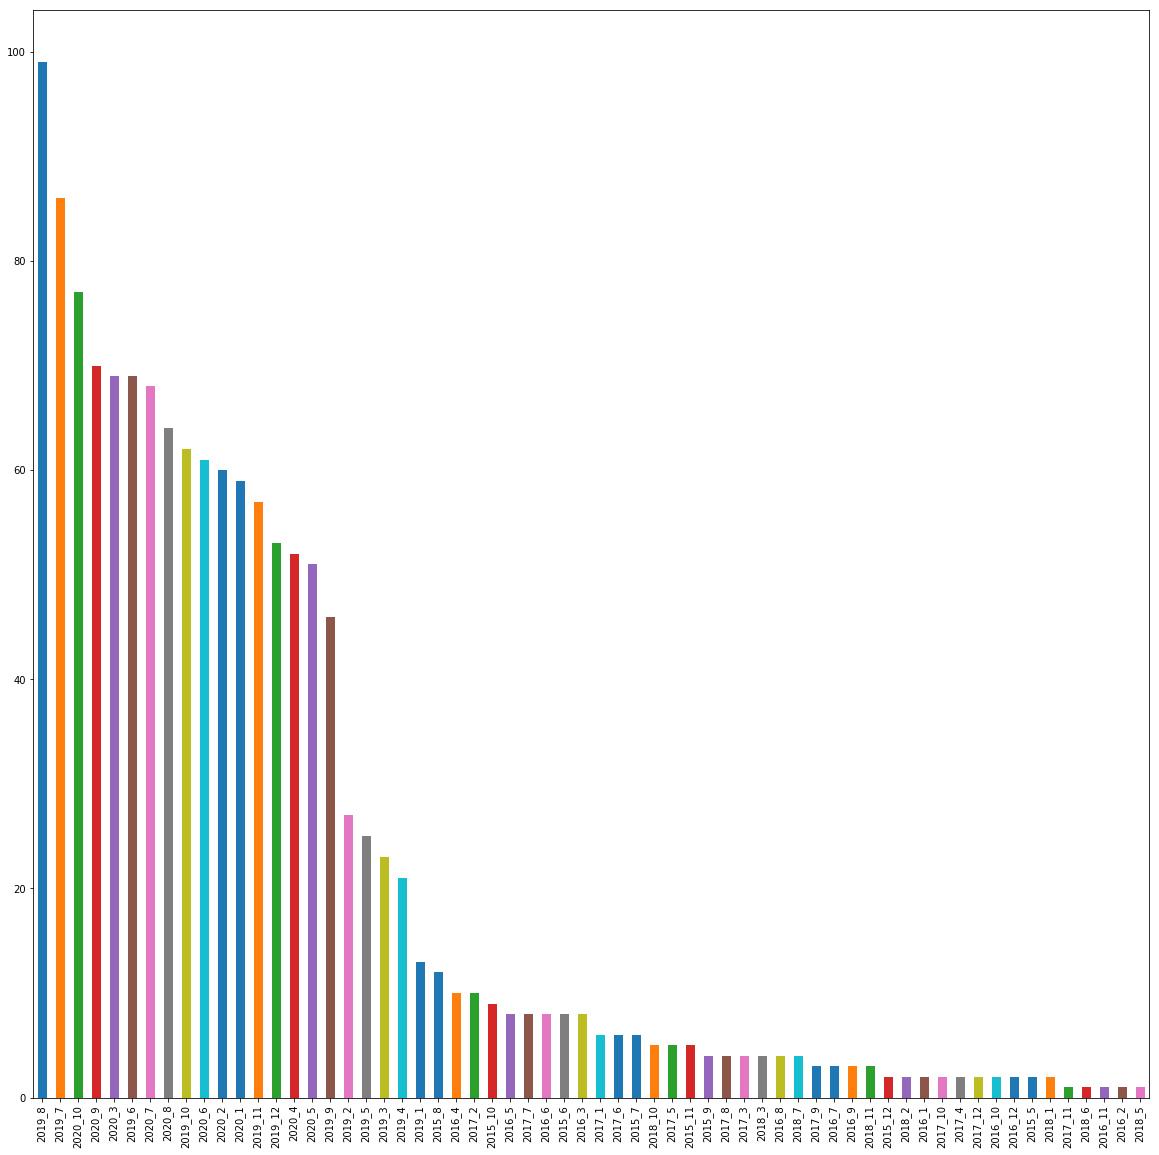

In [15]:
#Посчитаем сколько сообщений пришло в каждый месяц каждого гожа
year_month_count = df_python["year_month"].value_counts()
#Отрисуем распределение колличества сообщений по месяцам каждого года
year_month_count.plot.bar(figsize=(20,20))

In [16]:
#Посчитаем сколько раз слово python упомянулось в этом году
python_count2020 = df_python[df_python["date"].apply(lambda x: x.year==2020)].shape[0]
print(f"Всего в 2020 году было {python_count2020} сообщерний содержащих слово python")

Всего в 2020 году было 631 сообщерний содержащих слово python


In [17]:
#Посчитаем сколько раз слово python упомянулось в прошлом году
python_count2019 = df_python[df_python["date"].apply(lambda x: x.year==2019)].shape[0]
print(f"Всего в 2019 году было {python_count2019} сообщерний содержащих слово python")

Всего в 2019 году было 581 сообщерний содержащих слово python


In [18]:
#Сравним количество появлений слов python за 2020 и 2019 годы
if python_count2020 > python_count2019:
    print(f"Число упоминаний python выросло в 2020 году по сравнению с 2019 в {python_count2020 / float(python_count2019)}")
else:
    print(f"Число упоминаний python упало в 2020 году по сравнению с 2019 в {python_count2020 / float(python_count2019)}")

Число упоминаний python выросло в 2020 году по сравнению с 2019 в 1.0860585197934596


In [19]:
#Соберем все синонимы слова php
php_synonyms = ["php", "пхп"]
#Теперь посмотрим сколько строк сожержат слово php
df_php = df[df["text"].apply(lambda x: any([y in x for y in php_synonyms]))]
df_php.head()

,text,author,date
37,ты решил написать свой фреймворк. стоило оно т...,-20629724,2020-09-04 12:30:35
65,📌 proglib в telegram для новичков в нашей гру...,-54530371,2020-02-27 14:05:05
70,"👨🏼‍🎓профессиональный курс ""backend разработчик...",-79831840,2019-05-23 19:00:01
189,php. основы оопphp. основы ооп. урок 1php. осн...,-79831840,2019-08-15 18:00:00
233,регулярные выражения: базовое знакомство для н...,-54530371,2019-09-24 18:26:47


In [20]:
#Посмотрим сколько всеего строк сожержат слово php 
print(f"Всего строк содержащих слово python: {df_php.shape[0]}")

Всего строк содержащих слово python: 297


In [21]:
df_php = df_php.assign(year_month = df_php["date"].apply(lambda x: f"{x.year}_{x.month}"))
#Посчитаем сколько раз слово php упомянулось в этом году
php_count2020 = df_php[df_php["date"].apply(lambda x: x.year==2020)].shape[0]
print(f"Всего в 2020 году было {php_count2020} сообщерний содержащих слово php")
#Посчитаем сколько раз слово php упомянулось в прошлом году
php_count2019 = df_php[df_php["date"].apply(lambda x: x.year==2019)].shape[0]
print(f"Всего в 2019 году было {php_count2019} сообщерний содержащих слово php")

Всего в 2020 году было 118 сообщерний содержащих слово php
Всего в 2019 году было 144 сообщерний содержащих слово php


In [22]:
#Сравним количество появлений слов php за 2020 и 2019 годы
if php_count2020 > php_count2019:
    print(f"Число упоминаний php выросло в 2020 году по сравнению с 2019 в {php_count2020 / float(php_count2019)}")
else:
    print(f"Число упоминаний php упало в 2020 году по сравнению с 2019 в {php_count2020 / float(php_count2019)}")

Число упоминаний php упало в 2020 году по сравнению с 2019 в 0.8194444444444444
